In [1]:
from dataloader import Infection_Dataset, Covid_Dataset, Multiclass_Dataset
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

infection_train = Infection_Dataset('train')
infection_test = Infection_Dataset('test')
infection_val = Infection_Dataset('val')


In [2]:
infection_train.dataset_numbers

{'train_normal': 1341,
 'train_infected_noncovid': 2530,
 'train_infected_covid': 1345}

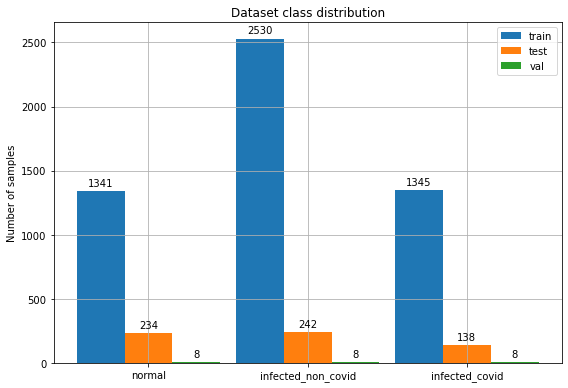

In [3]:
labels = ['normal', 'infected_non_covid', 'infected_covid']
x = np.arange(len(labels))
train_numbers = infection_train.dataset_numbers.values()
test_numbers = infection_test.dataset_numbers.values()
val_numbers = infection_val.dataset_numbers.values()

width = 0.3

fig, ax = plt.subplots(figsize=(8,5.5))
rects1 = ax.bar(x - width, train_numbers, width, label='train')
rects2 = ax.bar(x, test_numbers, width, label='test')
rects3 = ax.bar(x + width, val_numbers, width, label='val')

ax.set_ylabel('Number of samples')
ax.set_title('Dataset class distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.grid('--')
plt.savefig("./outputs/figures/dataset_distribution.pdf", bbox_inches='tight', dpi=900)

In [4]:
infection_df = pd.read_csv('./outputs/infection.csv', header=None)
covid_df = pd.read_csv('./outputs/covid.csv', header=None)
multiclass_df = pd.read_csv('./outputs/multiclass.csv', header=None)

In [5]:
infection_df.head()

,0,1,2,3,4
0,0,33.092213,16.765800,0.845859,0.633550
1,1,12.503611,12.092772,0.976419,0.811075
2,2,11.305546,16.903202,0.982745,0.719870
3,3,8.751532,15.205567,0.993865,0.757329
4,4,8.090662,17.444635,0.996933,0.741042


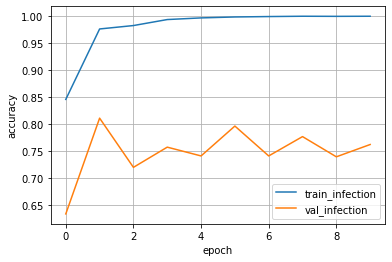

In [6]:
plt.plot(infection_df[0], infection_df[3], label='train_infection')
plt.plot(infection_df[0], infection_df[4], label='val_infection')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid('--')
plt.savefig("./outputs/figures/accuracy_plot_infection.pdf", bbox_inches='tight', dpi=900)

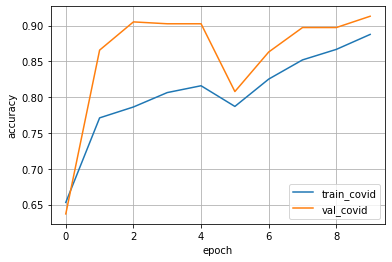

In [7]:
plt.plot(covid_df[0], covid_df[3], label='train_covid')
plt.plot(covid_df[0], covid_df[4], label='val_covid')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid('--')
plt.savefig("./outputs/figures/accuracy_plot_covid.pdf", bbox_inches='tight', dpi=900)

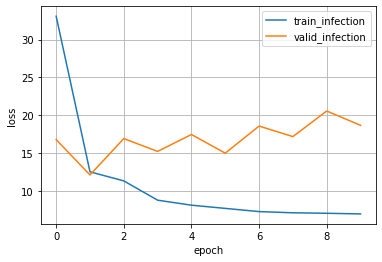

In [8]:
plt.plot(infection_df[0], infection_df[1], label='train_infection')
plt.plot(infection_df[0], infection_df[2], label='valid_infection')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid('--')
plt.savefig("./outputs/figures/loss_infection.pdf", bbox_inches='tight', dpi=900)

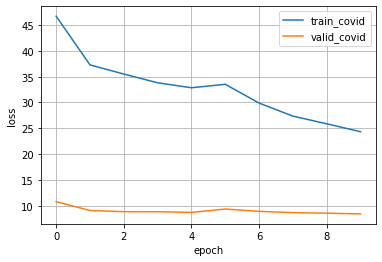

In [9]:
plt.plot(covid_df[0], covid_df[1], label='train_covid')
plt.plot(covid_df[0], covid_df[2], label='valid_covid')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid('--')
plt.savefig("./outputs/figures/loss_covid.pdf", bbox_inches='tight', dpi=900)

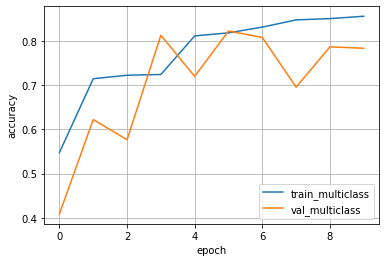

In [10]:
plt.plot(multiclass_df[0], multiclass_df[3], label='train_multiclass')
plt.plot(multiclass_df[0], multiclass_df[4], label='val_multiclass')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid('--')
plt.savefig("./outputs/figures/multiclass_accuracy_plot.pdf", bbox_inches='tight', dpi=900)

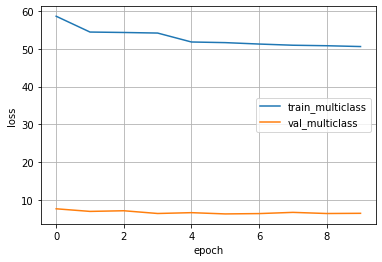

In [11]:
plt.plot(multiclass_df[0], multiclass_df[1], label='train_multiclass')
plt.plot(multiclass_df[0], multiclass_df[2], label='val_multiclass')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid('--')
plt.savefig("./outputs/figures/multiclass_loss_plot.pdf", bbox_inches='tight', dpi=900)

In [12]:
from dataloader import Infection_Dataset, Covid_Dataset, Multiclass_Dataset
from model import VGG
import copy
import torch

covid_val = Covid_Dataset('val')
infection_val = Infection_Dataset('val')

covid_val_loader = DataLoader(covid_val, batch_size = 1)
infection_val_loader = DataLoader(infection_val, batch_size = 1)

model_infection = VGG()
model_infection_path = './checkpoints/' + 'best_params_infection.pth'
model_infection.load_state_dict(copy.deepcopy(torch.load(model_infection_path, 'cpu')))
model_infection.to('cpu')
model_covid = VGG()
model_covid_path = './checkpoints/' + 'best_params_covid.pth'
model_covid.load_state_dict(copy.deepcopy(torch.load(model_covid_path, 'cpu')))
model_covid.to('cpu')

for images_data, target_labels in infection_val_loader:
    final_pred = None
    predicted_infection = model_infection(images_data)
    preds_infection = predicted_infection.argmax(dim=1)
    if preds_infection == 0:
        final_pred= 'normal'
    elif preds_infection == 1:
        predicted_covid = model_covid(images_data)
        preds_covid = predicted_covid.argmax(dim=1)
        if preds_covid == 0:
            final_pred = 'infected non-covid'
        else:
            final_pred = 'infected covid'
    print(final_pred)
    # im = np.asarray(images_data.squeeze())/255
    # plt.show(im)
    
    break

In [ ]:
print(1)

In [ ]:
def test(dataloader, model_infection, model_covid):
    """
    return the overall accuracy using the two classifiers on the dataset
    """
    model_infection.eval()
    model_covid.eval()
    count = 0
    correct = 0
    for images_data, target_labels in tqdm(dataloader):
        if config.use_gpu:
            images_data = images_data.cuda()
            target_labels = target_labels.cuda()
        predicted_infection = model_infection(images_data)
        count += predicted_infection.shape[0]
        preds_infection = predicted_infection.argmax(dim=1)
        targets = target_labels.argmax(dim=1)
        for i in range(len(preds_infection)):
            if preds_infection[i] == 0:
                if preds_infection[i] == targets[i]:
                    correct += 1
                continue
            else:
                predicted_covid = model_covid(images_data[i].unsqueeze(0))
                preds_covid = predicted_covid.argmax(dim=1) + 1
                correct += (preds_covid == targets[i])
    accuracy = correct * 1.0 / count
    return accuracy.item()